In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.signal as sig
import matplotlib.pyplot as plt

In [2]:
# Initial population
S1_ini = 0.999
S2_ini = 0
S3_ini = 0
S4_ini = 0
I_ini = 1 - S1_ini
R1_ini, R2_ini, R3_ini, R4_ini = 0, 0, 0, 0 
y0 = np.array([S1_ini, S2_ini, S3_ini, S4_ini, I_ini, R1_ini, R2_ini, R3_ini, R4_ini])
# A grid of time points (in days)
T = 500
t_range = np.linspace(0, T, T+1)

In [3]:
beta1 = 0.3
beta2 = 0.2
beta3 = 0.25
beta4 = 0.1
gamma1, gamma2, gamma3, gamma4 = 0.1,0.25,0.2,0.3
alpha = 0.1
mu = 0.1
omega = 0.1
phi = 0.1
nu = 0.1

In [4]:
# The proposed model
def model(t, y):
    S1, S2, S3, S4, I, R1, R2, R3, R4 = y
    dS1dt = mu - nu*S1 - beta1*S1*I + phi*S2 
    dS2dt = + nu*S1 - beta2*S2*I - phi*S2 
    dS3dt = - nu*S3 - beta3*S3*I + phi*S4 + omega*R1 + omega*R3 
    dS4dt = + nu*S3 - beta4*S4*I - phi*S4 + omega*R2 + omega*R4 
    dIdt = (- alpha + beta1*S1 + beta2*S2 + beta3*S3 + beta4*S4 - gamma1 - gamma2 - gamma3 - gamma4)*I
    dR1dt = + gamma1*I - omega*R1 + phi*R2
    dR2dt = + gamma2*I - omega*R2 - phi*R2
    dR3dt = + gamma3*I - omega*R3 + phi*R4
    dR4dt = + gamma4*I - omega*R4 - phi*R4
    dydt = np.array([dS1dt, dS2dt, dS3dt, dS4dt, dIdt, dR1dt, dR2dt, dR3dt, dR4dt])
    return dydt

# Integrate the proposed ODE model over the time grid, t.
model_sol = integrate.solve_ivp(model, [0,T], y0, method='RK45', t_eval=t_range)
S1, S2, S3, S4 = model_sol.y[0,:], model_sol.y[1,:], model_sol.y[2,:], model_sol.y[3,:]
I = model_sol.y[4,:]
R1, R2, R3, R4 = model_sol.y[5,:], model_sol.y[6,:], model_sol.y[7,:], model_sol.y[8,:]

# Total population
N = model_sol.y.sum(axis=0)

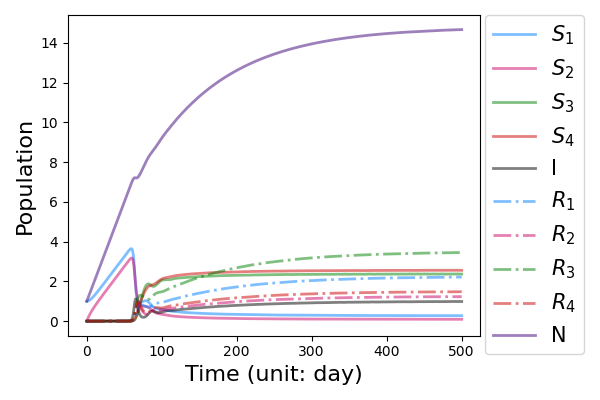

In [5]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, axisbelow=True)
  
ax.plot(t_range, S1, '#007FFF', alpha=0.5, lw=2, label='$S_1$')
ax.plot(t_range, S2, '#CC0066', alpha=0.5, lw=2, label='$S_2$')
ax.plot(t_range, S3, 'g', alpha=0.5, lw=2, label='$S_3$')
ax.plot(t_range, S4, '#CC0000', alpha=0.5, lw=2, label='$S_4$')
ax.plot(t_range, I, 'black', alpha=0.5, lw=2, label='I')
ax.plot(t_range, R1, '#007FFF', linestyle='-.', alpha=0.5, lw=2, label='$R_1$')
ax.plot(t_range, R2, '#CC0066', linestyle='-.',  alpha=0.5, lw=2, label='$R_2$')
ax.plot(t_range, R3, 'g-.', alpha=0.5, lw=2, label='$R_3$')
ax.plot(t_range, R4, '#CC0000', linestyle='-.', alpha=0.5, lw=2, label='$R_4$') 
ax.plot(t_range, N, '#3C0078', alpha=0.5, lw=2, label='N')
 
ax.set_xlabel('Time (unit: day)', fontsize=16)
ax.set_ylabel('Population', fontsize=16)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15,loc=2, bbox_to_anchor=(1.01,1.0),borderaxespad = 0.)
plt.tight_layout()
plt.show()